In [3]:
from CV.nn.conv.LeNet import LeNet
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras import backend as K
from CV.preprocessing.ImageToArrayPreprocessor import ImageToArrayPreprocessor
from CV.preprocessing.SimplePreprocessor import SimplePreprocessor
from CV.datasets.SimpleDatasetLoader import SimpleDatasetLoader
from CV.nn.conv.MiniGoogLeNet import MiniGoogLeNet
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
from keras.optimizers import Adam
import argparse 
from CV.nn.conv.MiniVGGNet import MiniVGGNet
'''
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-d", "--dataset", required=True,
help="path to the input data")
args = vars(ap.parse_args())

print("[info] loading images...")'''
#imagePaths = list(paths.list_images(args["dataset"]))
imagePaths = list(paths.list_images("C:/Users/HOU/Documents/practical_bundle/CV/datasets/data2/"))

sp = SimplePreprocessor(32, 32)
iap = ImageToArrayPreprocessor()

sdl = SimpleDatasetLoader(preprocessors=[sp, iap])
(data, labels) = sdl.load(imagePaths, verbose=500)
data = data.astype("float") / 255.0

#if K.image_data_format() == "channels_first":
#    data = data.reshape(data.shape[0],1,28,28)
#else:
#    data = data.reshape(data.shape[0], 28, 28, 1)
    

(train_X, test_X, train_y, test_y) = train_test_split(data,
                               labels, test_size=0.3,
                                                     random_state=21)


from keras.utils import to_categorical
lb = LabelBinarizer()
#train_y = lb.fit_transform(train_y)
#test_y = lb.fit_transform(test_y)
lb.fit(train_y)
train_y=lb.transform(train_y)
test_y = lb.transform(test_y)
train_y = to_categorical(train_y, num_classes=2)
test_y = to_categorical(test_y, num_classes=2)



[INFO] processed 500/5475
[INFO] processed 1000/5475
[INFO] processed 1500/5475
[INFO] processed 2000/5475
[INFO] processed 2500/5475
[INFO] processed 3000/5475
[INFO] processed 3500/5475
[INFO] processed 4000/5475
[INFO] processed 4500/5475
[INFO] processed 5000/5475


[INFO] compiling model...
[INFO] training network...
Train on 3832 samples, validate on 1643 samples
Epoch 1/30
3832/3832 [==============================] - 151s 39ms/step - loss: 0.7449 - acc: 0.5428 - val_loss: 0.8717 - val_acc: 0.5046
Epoch 2/30
3832/3832 [==============================] - 149s 39ms/step - loss: 0.6751 - acc: 0.6099 - val_loss: 1.8361 - val_acc: 0.5046
Epoch 3/30
3832/3832 [==============================] - 149s 39ms/step - loss: 0.6253 - acc: 0.6576 - val_loss: 0.6670 - val_acc: 0.5886
Epoch 4/30
3832/3832 [==============================] - 150s 39ms/step - loss: 0.5706 - acc: 0.7051 - val_loss: 0.6423 - val_acc: 0.6360
Epoch 5/30
3832/3832 [==============================] - 150s 39ms/step - loss: 0.4942 - acc: 0.7597 - val_loss: 3.9106 - val_acc: 0.5046
Epoch 6/30
3832/3832 [==============================] - 150s 39ms/step - loss: 0.4289 - acc: 0.8019 - val_loss: 1.6110 - val_acc: 0.5125
Epoch 7/30
3832/3832 [==============================] - 150s 39ms/step - loss

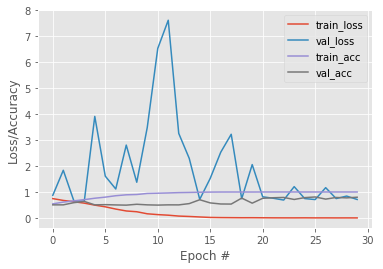

In [5]:
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception # TensorFlow ONLY
from keras.applications import VGG16
from keras.applications import VGG19
#lb = LabelBinarizer()
#train_y = lb.fit_transform(train_y)
#test_y = lb.fit_transform(test_y)

EPOCHS = 30
INIT_LR = 1e-3
BS = 32
# initialize the optimizer and model
print("[INFO] compiling model...")
#opt = SGD(lr=0.01, decay=0.01/40, momentum=0.9,nesterov=True)
#opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
opt = SGD(lr=INIT_LR, momentum=0.9)
#opt = SGD(lr=0.05, decay=0.01/40, momentum=0.9,nesterov=True)
model = MiniGoogLeNet.build(width=32, height=32, depth=3, classes=2)
model.compile(loss="binary_crossentropy", optimizer=opt,
metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H = model.fit(train_X, train_y, validation_data=(test_X, test_y),
    batch_size=BS, epochs=EPOCHS, verbose=1)

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(test_X, batch_size=BS)
print(classification_report(test_y.argmax(axis=1),predictions.argmax(axis=1),
      target_names=[str(x) for x in lb.classes_]))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_acc"], label="val_acc")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()